In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yükleme (dosya adını kendi dosyanızla değiştirin)
df = pd.read_csv('Money_Laundering.csv')

# Verinin ilk 5 satırını görüntüleme
print(df.head())

# Veri seti hakkında genel bilgi alma (sütun tipleri, boş değerler vb.)
print(df.info())

# Sayısal sütunlar için istatistiksel özet
print(df.describe())

       Time        Date  Sender_account  Receiver_account    Amount  \
0  10:35:19  2022-10-07      8724731955        2769355426   1459.15   
1  10:35:20  2022-10-07      1491989064        8401255335   6019.64   
2  10:35:20  2022-10-07       287305149        4404767002  14328.44   
3  10:35:21  2022-10-07      5376652437        9600420220  11895.00   
4  10:35:21  2022-10-07      9614186178        3803336972    115.25   

  Payment_currency Received_currency Sender_bank_location  \
0        UK pounds         UK pounds                   UK   
1        UK pounds            Dirham                   UK   
2        UK pounds         UK pounds                   UK   
3        UK pounds         UK pounds                   UK   
4        UK pounds         UK pounds                   UK   

  Receiver_bank_location  Payment_type  Is_laundering       Laundering_type  
0                     UK  Cash Deposit              0  Normal_Cash_Deposits  
1                    UAE  Cross-border            

In [4]:
# Bu kod, projenizin en doğru ve hatasız halidir.
# Lütfen bu bloğu kopyalayıp çalıştırın.

import pandas as pd

# 1. Adım: 'Date' ve 'Time' sütunlarını birleştirerek 'timestamp' adında YENİ bir sütun oluştur.
# Bu sütunun veri tipini özel bir datetime nesnesine çevir.
try:
    df['timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
    print("'timestamp' sütunu başarıyla oluşturuldu.")
except KeyError:
    print("Hata: Veri setinizde 'Date' ve/veya 'Time' sütunları bulunamadı. Lütfen sütun adlarını kontrol edin.")


# 2. Adım: Özellik Mühendisliği - Tüm zaman özelliklerini bu yeni 'timestamp' sütunundan türet.
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.day_name()
df['month'] = df['timestamp'].dt.month

# 3. Adım: Diğer özellikleri oluştur.
df['is_international'] = df['Sender_bank_location'] != df['Receiver_bank_location']
df['is_currency_changed'] = df['Payment_currency'] != df['Received_currency']

# 4. Adım: Veriyi iki gruba ayır.
df_uk = df[df['Sender_bank_location'] == 'UK'].copy()
df_not_uk = df[df['Sender_bank_location'] != 'UK'].copy()

print("\nÖzellik mühendisliği başarıyla tamamlandı.")
print("Veri setleri (df_uk ve df_not_uk) analize hazır.")

# 5. Adım: Oluşturulan yeni sütunları kontrol et.
print("\nOluşturulan yeni sütunlardan bazıları:")
print(df[['timestamp', 'hour', 'day_of_week', 'is_international', 'is_currency_changed']].head())

'timestamp' sütunu başarıyla oluşturuldu.

Özellik mühendisliği başarıyla tamamlandı.
Veri setleri (df_uk ve df_not_uk) analize hazır.

Oluşturulan yeni sütunlardan bazıları:
            timestamp  hour day_of_week  is_international  is_currency_changed
0 2022-10-07 10:35:19    10      Friday             False                False
1 2022-10-07 10:35:20    10      Friday              True                 True
2 2022-10-07 10:35:20    10      Friday             False                False
3 2022-10-07 10:35:21    10      Friday             False                False
4 2022-10-07 10:35:21    10      Friday             False                False


In [5]:
# Date ve Time sütunlarını birleştirip datetime formatına dönüştürme
df['timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Artık orijinal Date ve Time sütunlarını silebilirsiniz
df = df.drop(['Date', 'Time'], axis=1)

Toplam işlem sayısı: 9504852
------------------------------
UK kaynaklı işlem sayısı: 9183088 (Verinin %96.61'si)
UK dışı işlem sayısı: 321764 (Verinin %3.39'si)


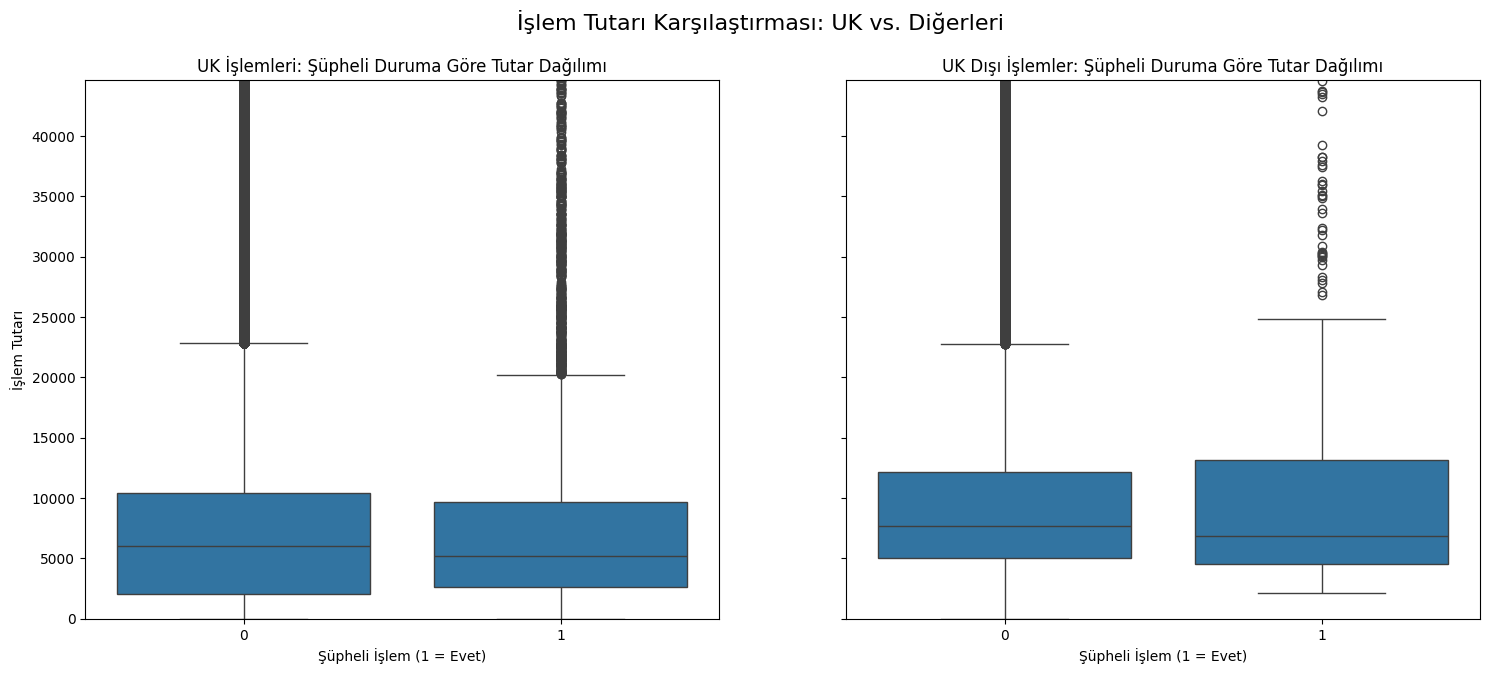

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yüklediğinizi varsayıyorum
# df = pd.read_csv('verisetiniz.csv')
# df['timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time']) # Zaman sütununu birleştirme

# 1. Grup: Sadece UK işlemleri
df_uk = df[df['Sender_bank_location'] == 'UK'].copy()

# 2. Grup: UK dışındaki tüm ülkelerin işlemleri
df_not_uk = df[df['Sender_bank_location'] != 'UK'].copy()

print(f"Toplam işlem sayısı: {len(df)}")
print("-" * 30)
print(f"UK kaynaklı işlem sayısı: {len(df_uk)} (Verinin %{100 * len(df_uk) / len(df):.2f}'si)")
print(f"UK dışı işlem sayısı: {len(df_not_uk)} (Verinin %{100 * len(df_not_uk) / len(df):.2f}'si)")

# 1 satır, 2 sütunluk bir grafik alanı oluşturalım
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True) # sharey=True y eksenini sabit tutar

# Grafik 1: UK İşlemleri Tutar Dağılımı
sns.boxplot(x='Is_laundering', y='Amount', data=df_uk, ax=axes[0])
axes[0].set_title('UK İşlemleri: Şüpheli Duruma Göre Tutar Dağılımı')
axes[0].set_xlabel('Şüpheli İşlem (1 = Evet)')
axes[0].set_ylabel('İşlem Tutarı')
# Çok büyük aykırı değerler grafiği okunmaz yapıyorsa limiti ayarlayabilirsiniz
axes[0].set_ylim(0, df_uk['Amount'].quantile(0.99))

# Grafik 2: UK Dışı İşlemler Tutar Dağılımı
sns.boxplot(x='Is_laundering', y='Amount', data=df_not_uk, ax=axes[1])
axes[1].set_title('UK Dışı İşlemler: Şüpheli Duruma Göre Tutar Dağılımı')
axes[1].set_xlabel('Şüpheli İşlem (1 = Evet)')
axes[1].set_ylabel('') # Sol grafikte etiket olduğu için tekrar yazmaya gerek yok

plt.suptitle('İşlem Tutarı Karşılaştırması: UK vs. Diğerleri', fontsize=16)
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(14, 12)) # Bu sefer alt alta çizelim

#Turuncu barları ayrı olarak ekle 
# Grafik 1: UK Ödeme Tipleri
sns.countplot(y='Payment_type', hue='Is_laundering', data=df_uk, ax=axes[0], order=df_uk['Payment_type'].value_counts().index)
axes[0].set_title('UK İçin Ödeme Tiplerinin Şüpheli İşlem Dağılımı')
axes[0].set_xlabel('İşlem Sayısı')
axes[0].set_ylabel('Ödeme Tipi')

# Grafik 2: UK Dışı Ödeme Tipleri
sns.countplot(y='Payment_type', hue='Is_laundering', data=df_not_uk, ax=axes[1], order=df_not_uk['Payment_type'].value_counts().index)
axes[1].set_title('UK Dışı Ülkeler İçin Ödeme Tiplerinin Şüpheli İşlem Dağılımı')
axes[1].set_xlabel('İşlem Sayısı')
axes[1].set_ylabel('Ödeme Tipi')

plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Başlığın sıkışmasını önler
plt.suptitle('Ödeme Tipi Karşılaştırması: UK vs. Diğerleri', fontsize=16)
plt.show()

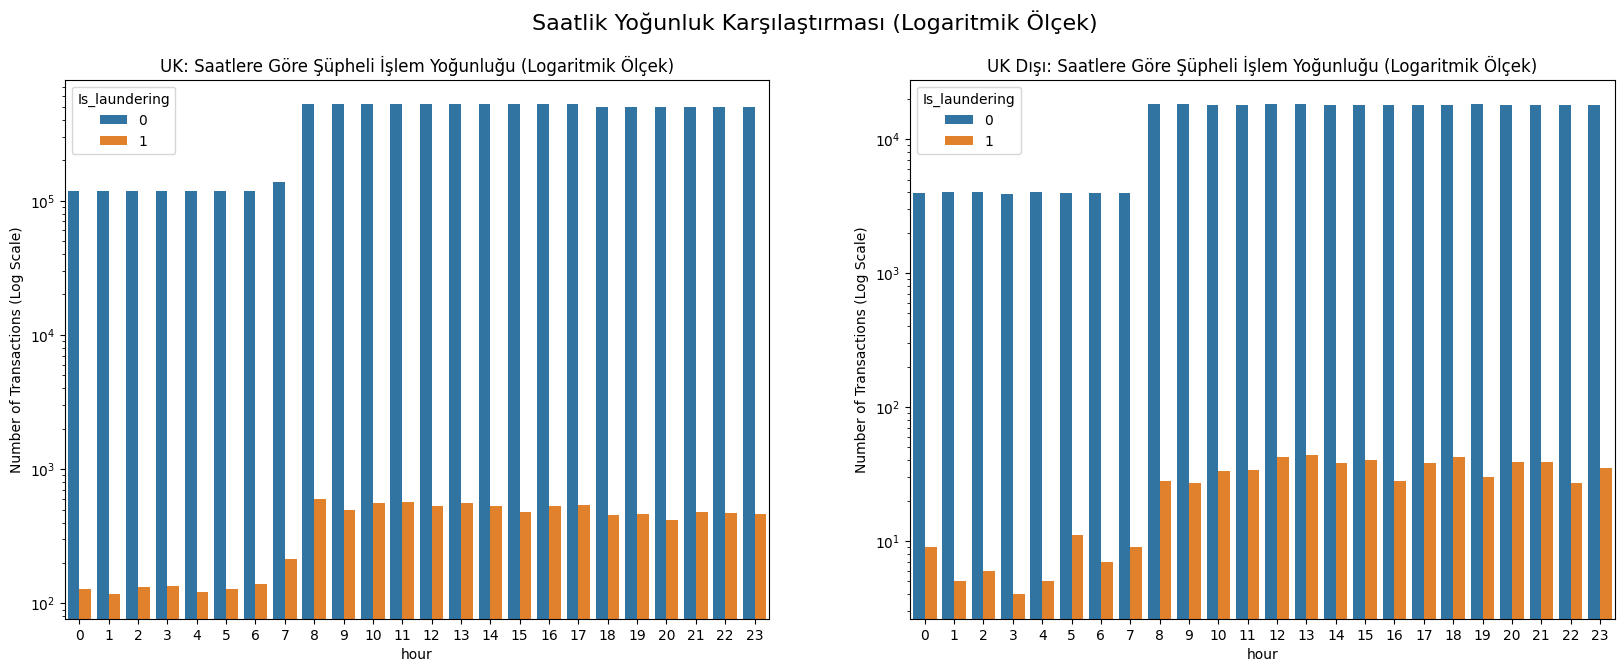

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7)) # sharey=True log ile iyi çalışmaz, kaldırdık

# Grafik 1: UK Saatlik Dağılım (Log Ölçekli)
sns.countplot(x='hour', hue='Is_laundering', data=df_uk, ax=axes[0])
axes[0].set_title('UK: Saatlere Göre Şüpheli İşlem Yoğunluğu (Logaritmik Ölçek)')
axes[0].set_xlabel('hour')
axes[0].set_ylabel('Number of Transactions (Log Scale)') # EKSENİ BELİRTMEK ÖNEMLİ!
axes[0].set_yscale('log') # İŞTE BU SATIR EKLENDİ

# Grafik 2: UK Dışı Saatlik Dağılım (Log Ölçekli)
sns.countplot(x='hour', hue='Is_laundering', data=df_not_uk, ax=axes[1])
axes[1].set_title('UK Dışı: Saatlere Göre Şüpheli İşlem Yoğunluğu (Logaritmik Ölçek)')
axes[1].set_xlabel('hour')
axes[1].set_ylabel('Number of Transactions (Log Scale)') # EKSENİ BELİRTMEK ÖNEMLİ!
axes[1].set_yscale('log') # İŞTE BU SATIR EKLENDİ

plt.suptitle('Saatlik Yoğunluk Karşılaştırması (Logaritmik Ölçek)', fontsize=16)
plt.show()

Toplam işlem sayısı: 9504852
------------------------------
UK kaynaklı işlem sayısı: 9183088 (Verinin %96.61'si)
UK dışı işlem sayısı: 321764 (Verinin %3.39'si)


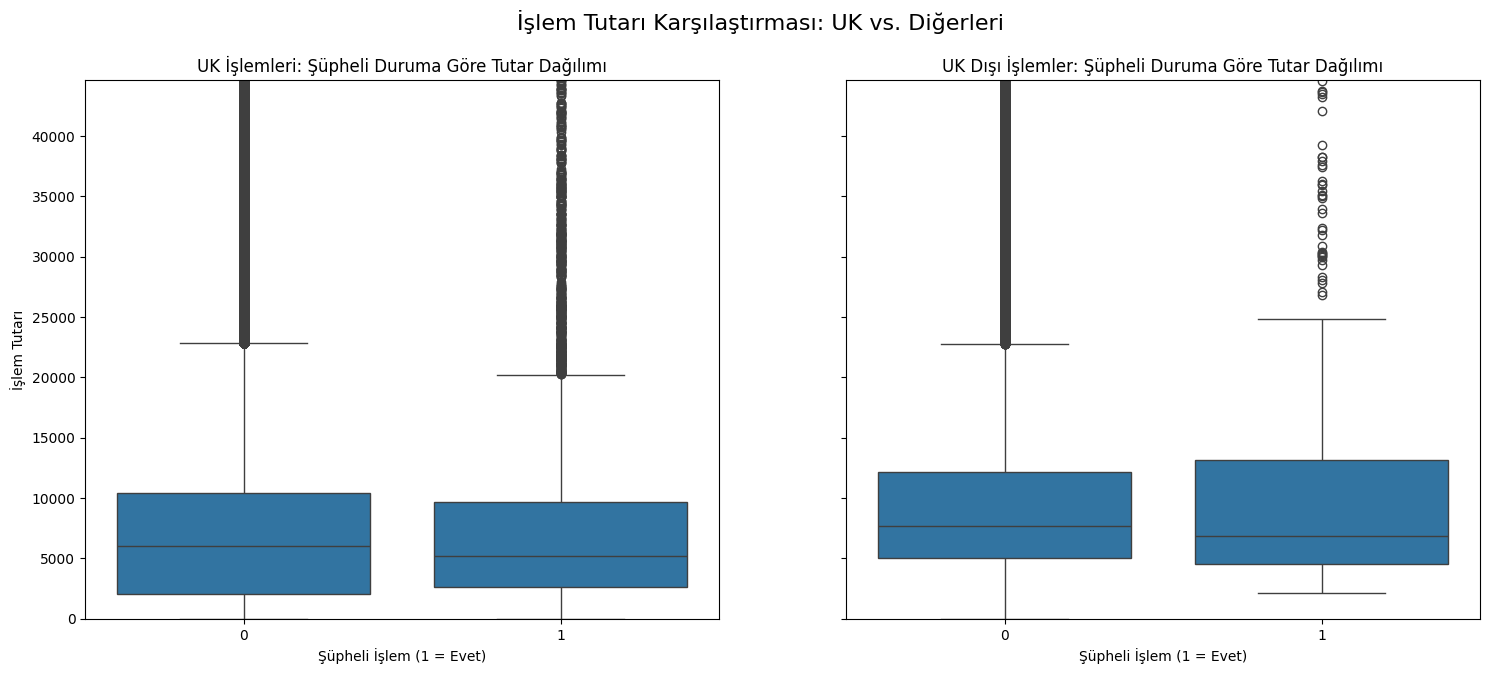

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri setini yüklediğinizi varsayıyorum
# df = pd.read_csv('verisetiniz.csv')
# df['timestamp'] = pd.to_datetime(df['Date'] + ' ' + df['Time']) # Zaman sütununu birleştirme

# 1. Grup: Sadece UK işlemleri
df_uk = df[df['Sender_bank_location'] == 'UK'].copy()

# 2. Grup: UK dışındaki tüm ülkelerin işlemleri
df_not_uk = df[df['Sender_bank_location'] != 'UK'].copy()

print(f"Toplam işlem sayısı: {len(df)}")
print("-" * 30)
print(f"UK kaynaklı işlem sayısı: {len(df_uk)} (Verinin %{100 * len(df_uk) / len(df):.2f}'si)")
print(f"UK dışı işlem sayısı: {len(df_not_uk)} (Verinin %{100 * len(df_not_uk) / len(df):.2f}'si)")

# 1 satır, 2 sütunluk bir grafik alanı oluşturalım
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True) # sharey=True y eksenini sabit tutar

# Grafik 1: UK İşlemleri Tutar Dağılımı
sns.boxplot(x='Is_laundering', y='Amount', data=df_uk, ax=axes[0])
axes[0].set_title('UK İşlemleri: Şüpheli Duruma Göre Tutar Dağılımı')
axes[0].set_xlabel('Şüpheli İşlem (1 = Evet)')
axes[0].set_ylabel('İşlem Tutarı')
# Çok büyük aykırı değerler grafiği okunmaz yapıyorsa limiti ayarlayabilirsiniz
axes[0].set_ylim(0, df_uk['Amount'].quantile(0.99))

# Grafik 2: UK Dışı İşlemler Tutar Dağılımı
sns.boxplot(x='Is_laundering', y='Amount', data=df_not_uk, ax=axes[1])
axes[1].set_title('UK Dışı İşlemler: Şüpheli Duruma Göre Tutar Dağılımı')
axes[1].set_xlabel('Şüpheli İşlem (1 = Evet)')
axes[1].set_ylabel('') # Sol grafikte etiket olduğu için tekrar yazmaya gerek yok

plt.suptitle('İşlem Tutarı Karşılaştırması: UK vs. Diğerleri', fontsize=16)
plt.show()

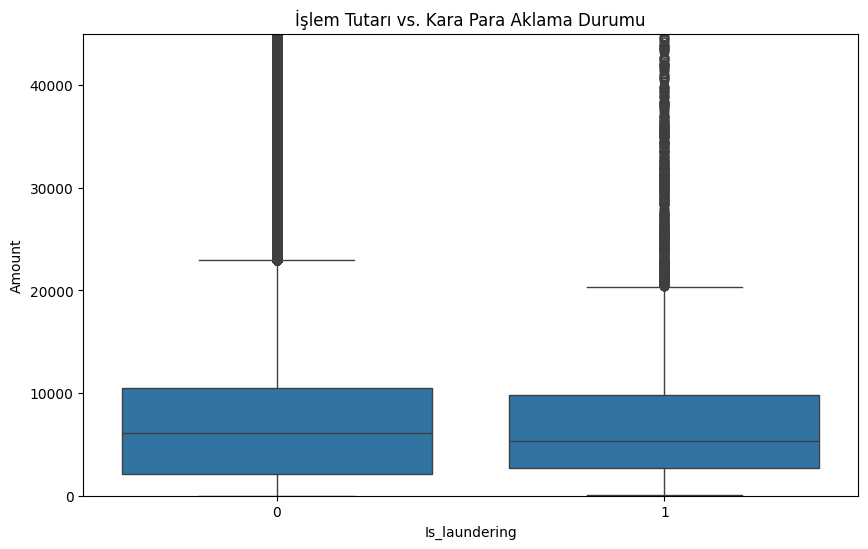

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is_laundering', y='Amount', data=df)
plt.title('İşlem Tutarı vs. Kara Para Aklama Durumu')
plt.ylim(0, df['Amount'].quantile(0.99)) # Aykırı değerleri dışarıda bırakmak için
plt.show()

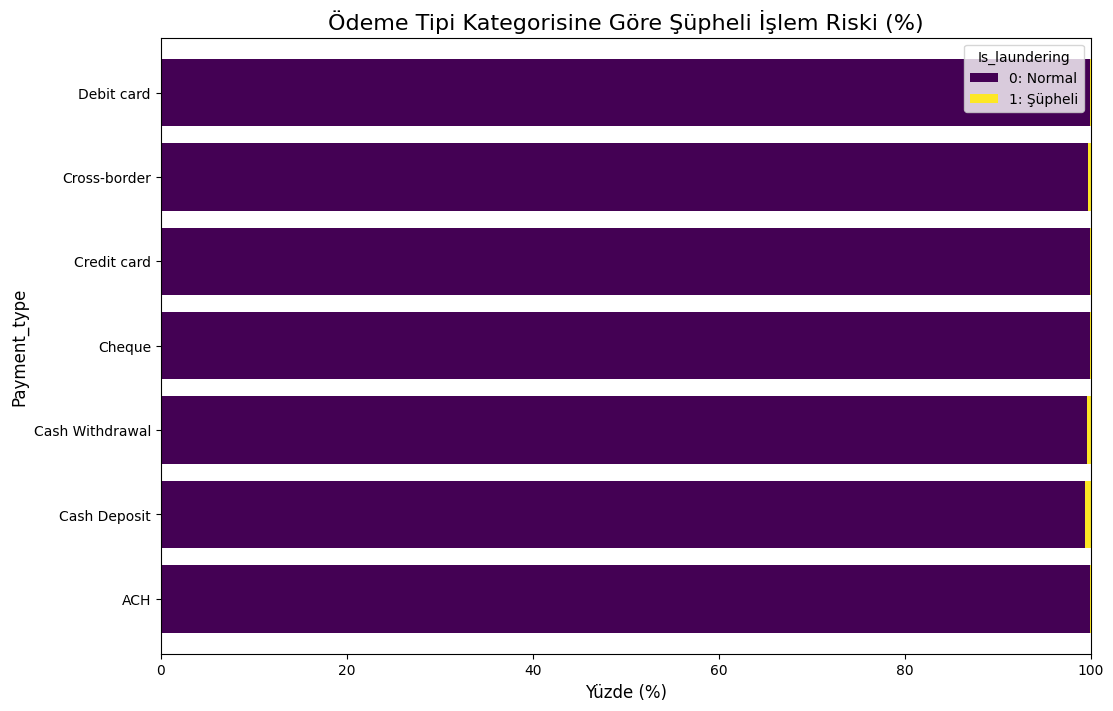

In [2]:
# 1. Adım: Veriyi mutlak sayılardan oranlara çevirelim
# Her ödeme tipinin kendi içindeki şüpheli ve normal işlem yüzdesini hesaplıyoruz
payment_ratio = pd.crosstab(df['Payment_type'], df['Is_laundering'], normalize='index') * 100

# 2. Adım: %100 Yığılmış Çubuk Grafik ile görselleştirelim
fig, ax = plt.subplots(figsize=(12, 8))
payment_ratio.plot(kind='barh', stacked=True, ax=ax, colormap='viridis', width=0.8)

ax.set_title('Ödeme Tipi Kategorisine Göre Şüpheli İşlem Riski (%)', fontsize=16)
ax.set_xlabel('Yüzde (%)', fontsize=12)
ax.set_ylabel('Payment_type', fontsize=12)
ax.legend(title='Is_laundering', labels=['0: Normal', '1: Şüpheli'])

# Her çubuğun %100'e ulaştığından emin olmak için
ax.set_xlim(0, 100)

plt.show()

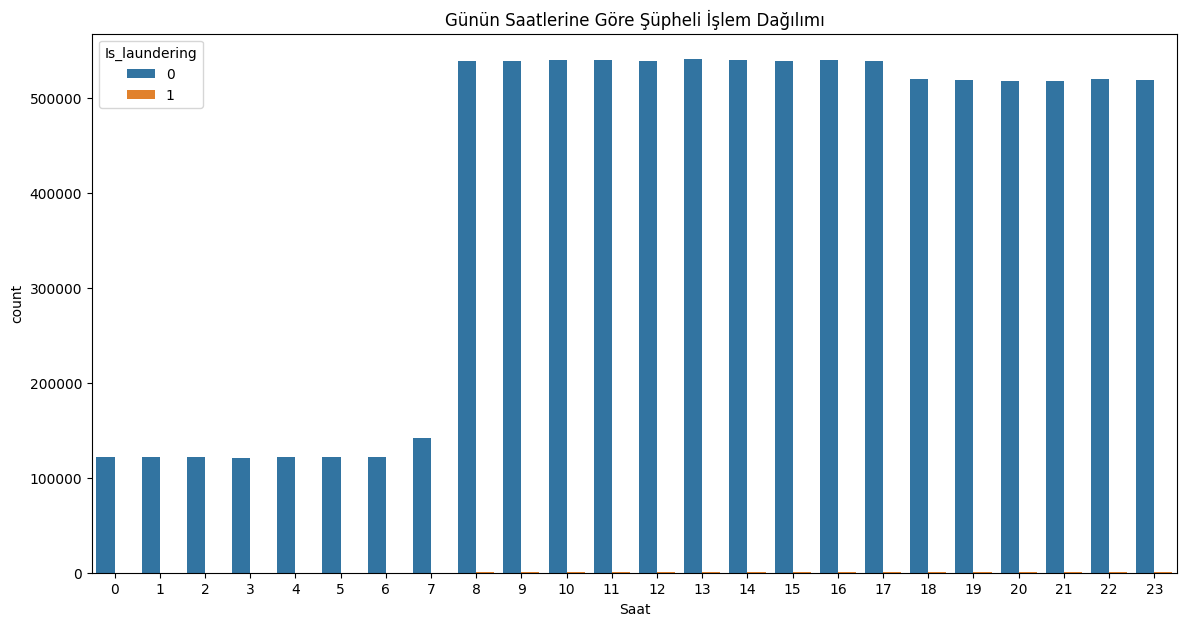

In [39]:
df['hour'] = df['timestamp'].dt.hour
plt.figure(figsize=(14, 7))
sns.countplot(x='hour', hue='Is_laundering', data=df)
plt.title('Günün Saatlerine Göre Şüpheli İşlem Dağılımı')
plt.xlabel('Saat')
plt.show()

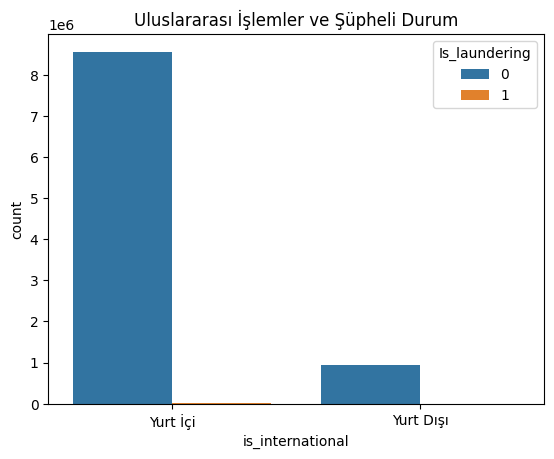

In [10]:
df['is_international'] = df['Sender_bank_location'] != df['Receiver_bank_location']
sns.countplot(x='is_international', hue='Is_laundering', data=df)
plt.title('Uluslararası İşlemler ve Şüpheli Durum')
plt.xticks([0, 1], ['Yurt İçi', 'Yurt Dışı'])
plt.show()

C:\Windows\Temp\ipykernel_21464\4043076289.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Hayır', 'Evet'])
C:\Windows\Temp\ipykernel_21464\4043076289.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Hayır', 'Evet'])


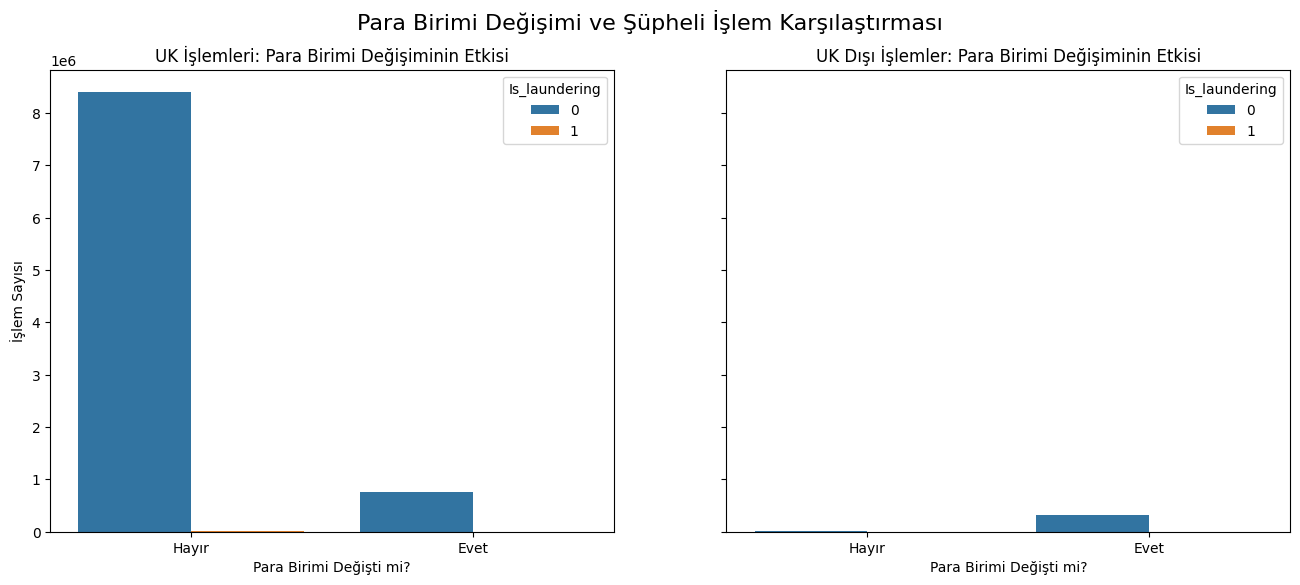

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Grafik 1: UK Para Birimi Değişimi
sns.countplot(x='is_currency_changed', hue='Is_laundering', data=df_uk, ax=axes[0])
axes[0].set_title('UK İşlemleri: Para Birimi Değişiminin Etkisi')
axes[0].set_xlabel('Para Birimi Değişti mi?')
axes[0].set_xticklabels(['Hayır', 'Evet'])
axes[0].set_ylabel('İşlem Sayısı')

# Grafik 2: UK Dışı Para Birimi Değişimi
sns.countplot(x='is_currency_changed', hue='Is_laundering', data=df_not_uk, ax=axes[1])
axes[1].set_title('UK Dışı İşlemler: Para Birimi Değişiminin Etkisi')
axes[1].set_xlabel('Para Birimi Değişti mi?')
axes[1].set_xticklabels(['Hayır', 'Evet'])
axes[1].set_ylabel('')

plt.suptitle('Para Birimi Değişimi ve Şüpheli İşlem Karşılaştırması', fontsize=16)
plt.show()

C:\Windows\Temp\ipykernel_21464\4052469521.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(['Yurt İçi', 'Yurt Dışı'])
C:\Windows\Temp\ipykernel_21464\4052469521.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['Yurt İçi', 'Yurt Dışı'])


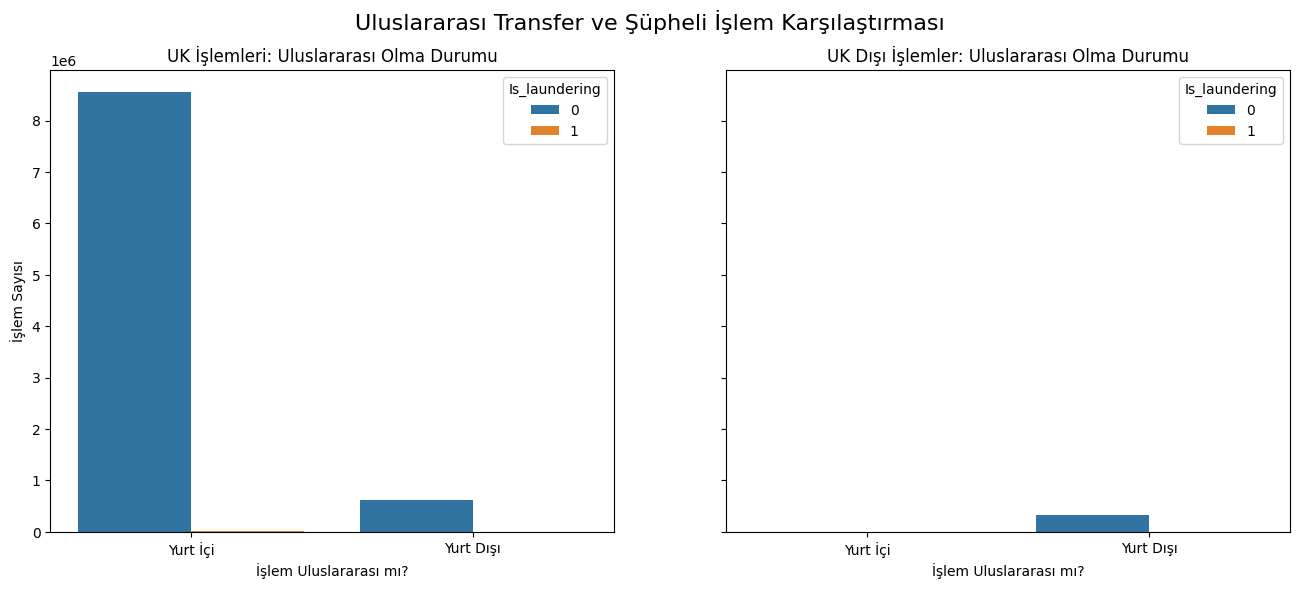

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Grafik 1: UK Uluslararası İşlem Durumu
sns.countplot(x='is_international', hue='Is_laundering', data=df_uk, ax=axes[0])
axes[0].set_title('UK İşlemleri: Uluslararası Olma Durumu')
axes[0].set_xlabel('İşlem Uluslararası mı?')
axes[0].set_xticklabels(['Yurt İçi', 'Yurt Dışı'])
axes[0].set_ylabel('İşlem Sayısı')

# Grafik 2: UK Dışı Uluslararası İşlem Durumu
sns.countplot(x='is_international', hue='Is_laundering', data=df_not_uk, ax=axes[1])
axes[1].set_title('UK Dışı İşlemler: Uluslararası Olma Durumu')
axes[1].set_xlabel('İşlem Uluslararası mı?')
axes[1].set_xticklabels(['Yurt İçi', 'Yurt Dışı'])
axes[1].set_ylabel('')

plt.suptitle('Uluslararası Transfer ve Şüpheli İşlem Karşılaştırması', fontsize=16)
plt.show()

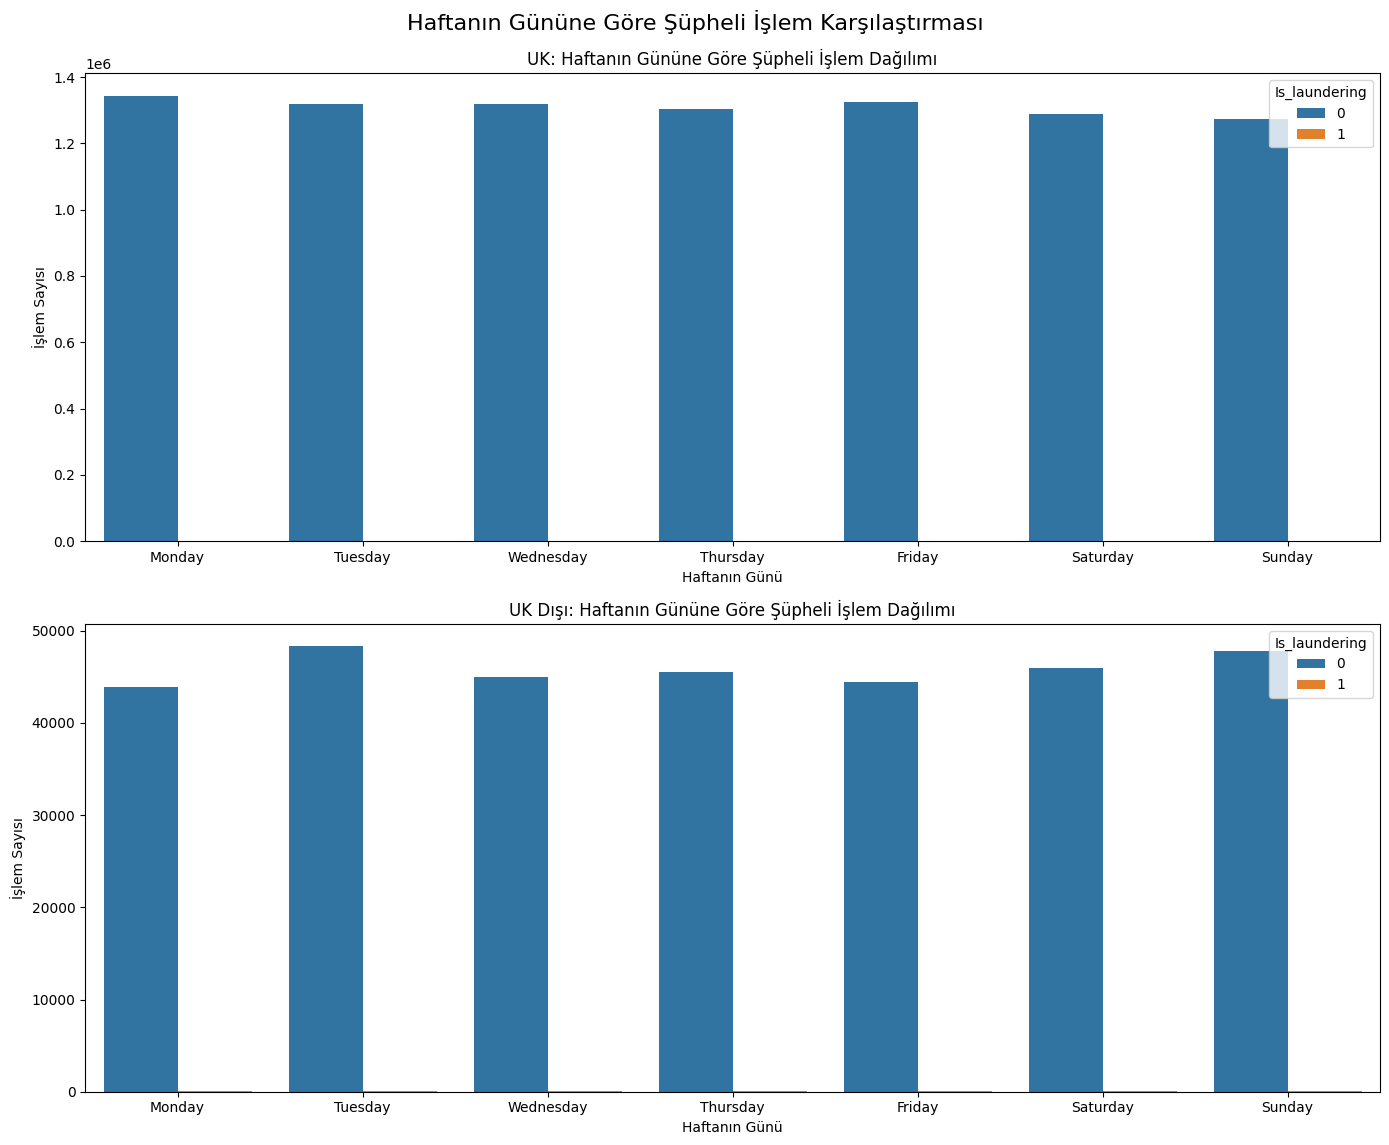

In [43]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, axes = plt.subplots(2, 1, figsize=(14, 12))

# Grafik 1: UK Haftanın Günü Dağılımı
sns.countplot(x='day_of_week', hue='Is_laundering', data=df_uk, ax=axes[0], order=days_order)
axes[0].set_title('UK: Haftanın Gününe Göre Şüpheli İşlem Dağılımı')
axes[0].set_xlabel('Haftanın Günü')
axes[0].set_ylabel('İşlem Sayısı')

# Grafik 2: UK Dışı Haftanın Günü Dağılımı
sns.countplot(x='day_of_week', hue='Is_laundering', data=df_not_uk, ax=axes[1], order=days_order)
axes[1].set_title('UK Dışı: Haftanın Gününe Göre Şüpheli İşlem Dağılımı')
axes[1].set_xlabel('Haftanın Günü')
axes[1].set_ylabel('İşlem Sayısı')


plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.suptitle('Haftanın Gününe Göre Şüpheli İşlem Karşılaştırması', fontsize=16)
plt.show()

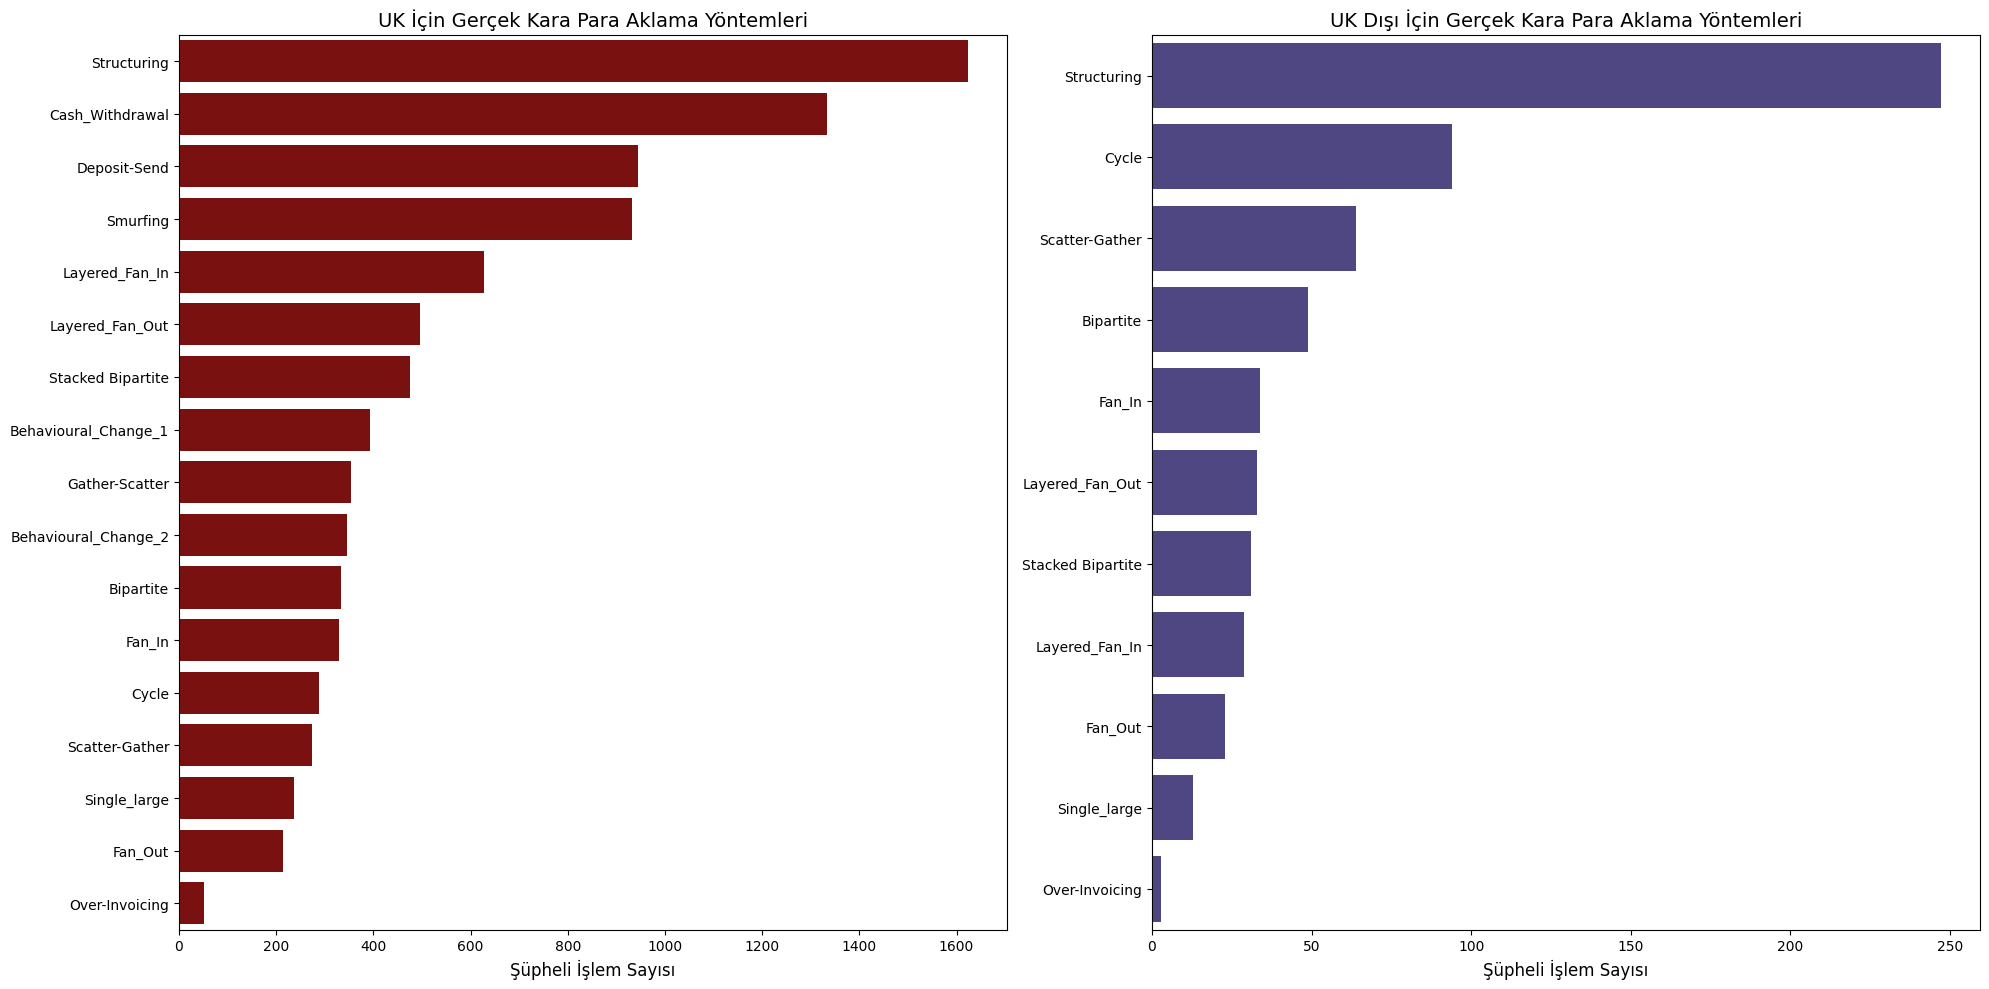

In [11]:
#==============================================================================
# ADIM 1: SADECE GERÇEK AKLAMA İŞLEMLERİNİ FİLTRELEME
#==============================================================================
# İlk olarak, sadece Is_laundering = 1 olan işlemleri seçiyoruz.
laundering_only_df = df[df['Is_laundering'] == 1].copy()

# İkinci olarak, bu filtrelenmiş veri içinden bile, 'Normal' ile başlayan 
# tüm artık kategorileri temizliyoruz. Bu, en doğru ve temiz sonucu verir.
actual_laundering_df = laundering_only_df[~laundering_only_df['Laundering_type'].str.startswith('Normal')].copy()

#==============================================================================
# ADIM 2: TEMİZLENMİŞ VERİYİ COĞRAFİ GRUPLARA AYIRMA
#==============================================================================
uk_actual_laundering = actual_laundering_df[actual_laundering_df['Sender_bank_location'] == 'UK']
not_uk_actual_laundering = actual_laundering_df[actual_laundering_df['Sender_bank_location'] != 'UK']

#==============================================================================
# ADIM 3: TEMİZ GRAFİĞİ OLUŞTURMA
#==============================================================================
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Grafik 1: UK Gerçek Aklama Tipleri
sns.countplot(y='Laundering_type', data=uk_actual_laundering, ax=axes[0], 
              order=uk_actual_laundering['Laundering_type'].value_counts().index,
              color='darkred')
axes[0].set_title('UK İçin Gerçek Kara Para Aklama Yöntemleri', fontsize=14)
axes[0].set_xlabel('Şüpheli İşlem Sayısı', fontsize=12)
axes[0].set_ylabel('')

# Grafik 2: UK Dışı Gerçek Aklama Tipleri
sns.countplot(y='Laundering_type', data=not_uk_actual_laundering, ax=axes[1], 
              order=not_uk_actual_laundering['Laundering_type'].value_counts().index,
              color='darkslateblue')
axes[1].set_title('UK Dışı İçin Gerçek Kara Para Aklama Yöntemleri', fontsize=14)
axes[1].set_xlabel('Şüpheli İşlem Sayısı', fontsize=12)
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

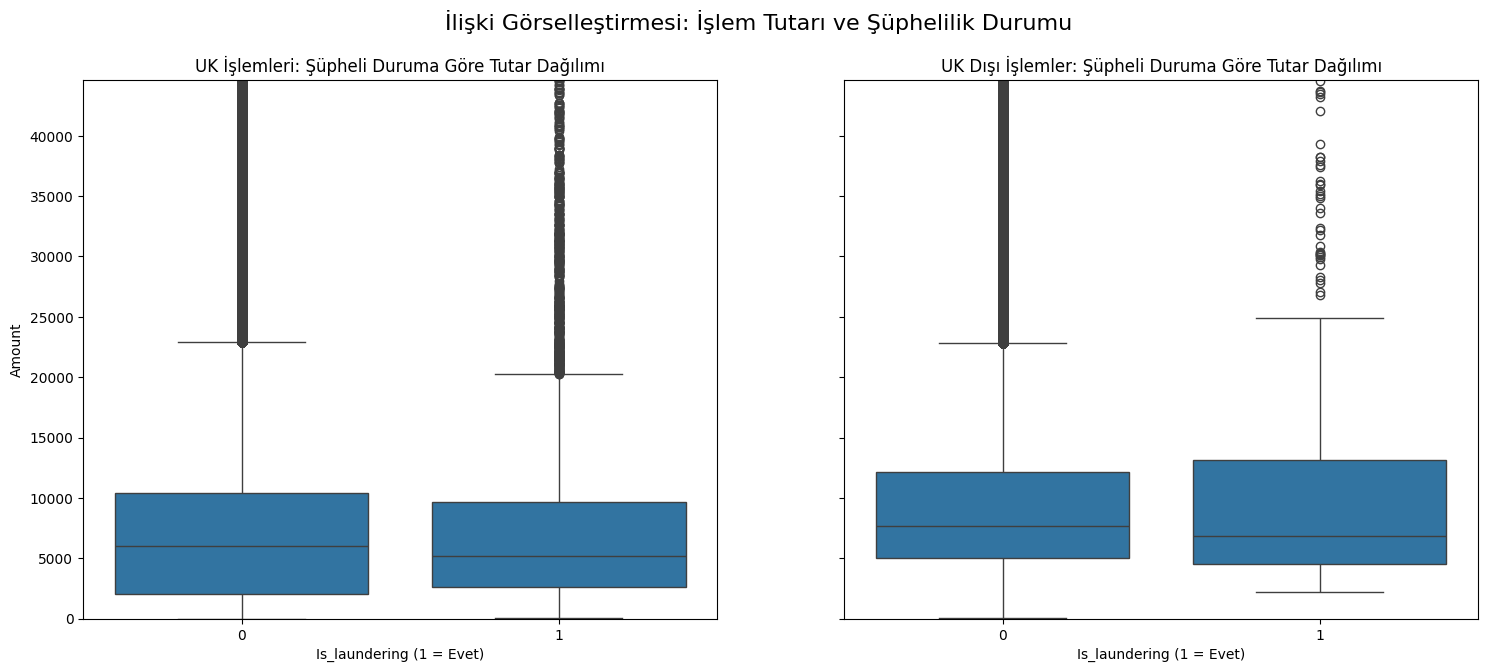

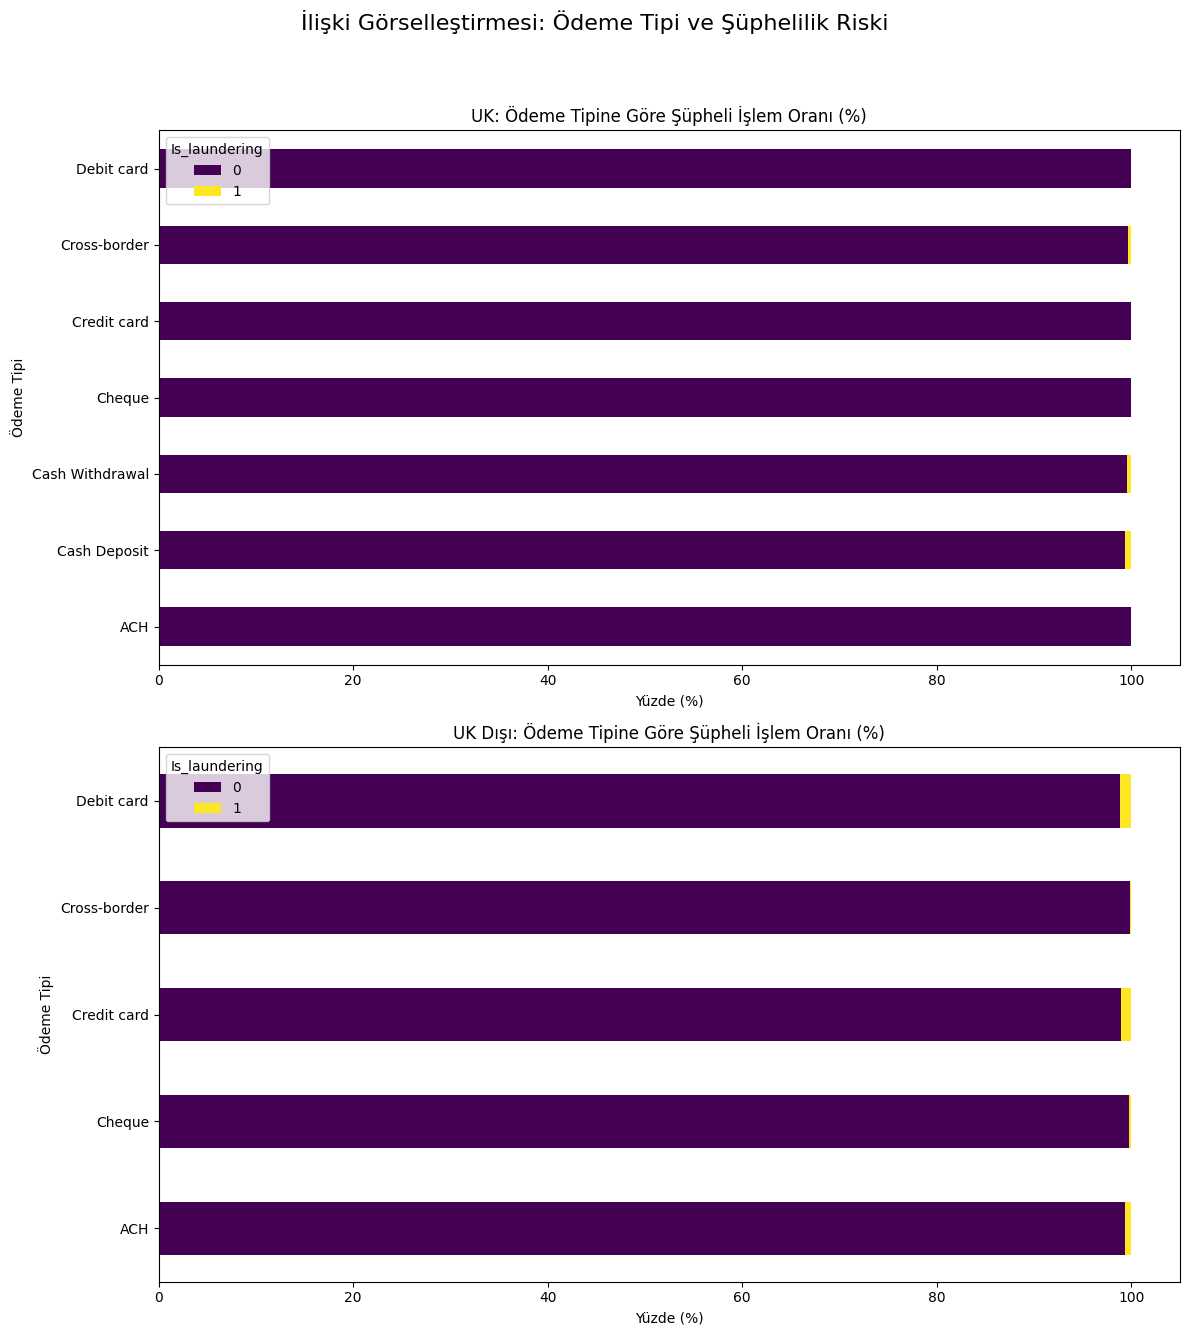

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1 satır, 2 sütunluk bir grafik alanı oluşturalım
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True) # sharey=True y eksenini sabit tutar

# Grafik 1: UK İşlemleri için Kutu Grafiği
sns.boxplot(x='Is_laundering', y='Amount', data=df_uk, ax=axes[0])
axes[0].set_title('UK İşlemleri: Şüpheli Duruma Göre Tutar Dağılımı')
axes[0].set_xlabel('Is_laundering (1 = Evet)')
axes[0].set_ylabel('Amount')
# Aykırı değerler grafiği okunmaz yapıyorsa limiti ayarlayabilirsiniz
axes[0].set_ylim(0, df_uk['Amount'].quantile(0.99))

# Grafik 2: UK Dışı İşlemler için Kutu Grafiği
sns.boxplot(x='Is_laundering', y='Amount', data=df_not_uk, ax=axes[1])
axes[1].set_title('UK Dışı İşlemler: Şüpheli Duruma Göre Tutar Dağılımı')
axes[1].set_xlabel('Is_laundering (1 = Evet)')
axes[1].set_ylabel('') # Sol grafikte etiket olduğu için tekrar yazmaya gerek yok

plt.suptitle('İlişki Görselleştirmesi: İşlem Tutarı ve Şüphelilik Durumu', fontsize=16)
plt.show()
"""Bu grafiğin faydası:** Bu görsel, UK dışı işlemlerde şüpheli (`1`) kutusunun normal (`0`) kutusundan ne kadar yukarıda olduğunu net bir şekilde göstererek, aradaki pozitif korelasyonu **kanıtlar**.

---

#### 2. Öneri: Kategorik-Kategorik İlişkiyi Göstermek İçin (`Payment_type` vs. `Is_laundering`)

**En İyi Araç: %100 Yığılmış Çubuk Grafik (100% Stacked Bar Chart)**

Bu grafik, mutlak sayılardan ziyade **oranları** karşılaştırmak için mükemmeldir. "Hangi ödeme tipinde şüpheli işlem *riski* daha yüksek?" sorusuna en net cevabı verir.

```python"""
# 1. Adım: Veriyi oranlara çevirelim
# Her ödeme tipinin kendi içindeki şüpheli ve normal işlem yüzdesini hesapla
uk_ratio = pd.crosstab(df_uk['Payment_type'], df_uk['Is_laundering'], normalize='index') * 100
not_uk_ratio = pd.crosstab(df_not_uk['Payment_type'], df_not_uk['Is_laundering'], normalize='index') * 100

# 2. Adım: Görselleştirelim
fig, axes = plt.subplots(2, 1, figsize=(12, 14))

# Grafik 1: UK Oranları
uk_ratio.plot(kind='barh', stacked=True, ax=axes[0], colormap='viridis')
axes[0].set_title('UK: Ödeme Tipine Göre Şüpheli İşlem Oranı (%)')
axes[0].set_xlabel('Yüzde (%)')
axes[0].set_ylabel('Ödeme Tipi')

# Grafik 2: UK Dışı Oranları
not_uk_ratio.plot(kind='barh', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title('UK Dışı: Ödeme Tipine Göre Şüpheli İşlem Oranı (%)')
axes[1].set_xlabel('Yüzde (%)')
axes[1].set_ylabel('Ödeme Tipi')

plt.suptitle('İlişki Görselleştirmesi: Ödeme Tipi ve Şüphelilik Riski', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()